# Exploring Butler Volmer Kinetics
## Import Libraries

In [1]:
import sys
sys.path.append("/pithy/code")
from pithy import *
%matplotlib inline

## Define Constants and Butler Volmer Relationship
$$ F = 96,487 \frac{C}{mol} $$

$$ R = 8.314 \frac{J}{mol K} $$

$$ i = i_0 \left(e^\frac{\alpha_a F \eta_s}{RT} - e^\frac{-\alpha_c F \eta_s}{RT}\right) $$

In [2]:
F = 96487 # Faradays Constant C/Mol
R = 8.314 # Ideal Gas Constant

#Butler-Volmer Relationship
def BV(eta_s,T=298.0,aa=.5,ac=.5,io=1):
    anodic = exp((aa)*F*eta_s/(R*T))
    cathodic = exp((-ac)*F*eta_s/(R*T))
    return io*(anodic-cathodic)


## Consider Kinetics of a "Battery" about OCV

Assuming no other overpotentials, as we charge or discharge a system assuming

$$\alpha_a = \alpha_c = .5 $$


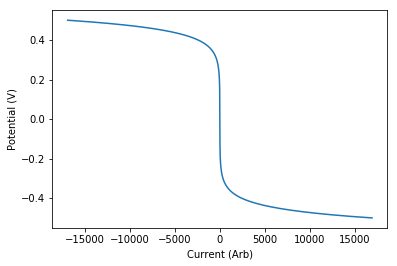

In [3]:
eta = linspace(-.5,.5,1000) # Voltage to "sweep"
plot(-BV(eta),eta) # Plot Potential vs. Current 
ylabel("Potential (V)") 
xlabel("Current (Arb)")

We see that we take an immediate tax when any load or current is applied, and then the system gives us the current we want generally at that taxed potential.

## The Better Way to Consider Kinetics
If we rotate the previous plot by 90 degrees, this helps us consider the extra "push" we need beyond thermodynamics to get a reaction going to useful currents.  

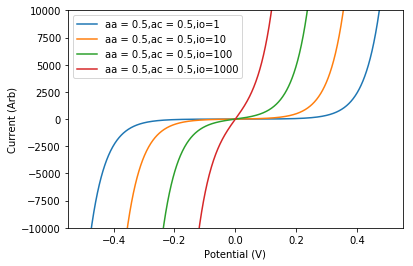

In [4]:
ext =.5
eta = linspace(-ext,ext,1000)

aa = .5
ac = .5

for io in [1,10,100,1000]:
    plot(eta,BV(eta,aa=aa,ac=ac,io=io),label="aa = %.1f,ac = %.1f,io=%.0f"%(aa,ac,io))

legend()
ylim(-1e4,1e4)
xlabel("Potential (V)")
ylabel("Current (Arb)")


From the above we see that $i_0$ is parameter we'd like to engineer to improve kinetics